# データの読み込み

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
# csvデータの読み込み
df = pd.read_csv('housing.csv')

In [6]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布の確認


In [7]:
import seaborn as sns

C:\Users\KijimaKenta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

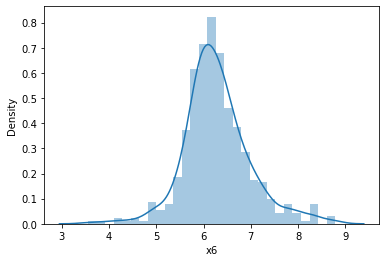

In [16]:
sns.distplot(df["x6"])

# 外れ値除去

In [17]:
col = 'x6'

In [20]:
# mean(平均)
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [19]:
mean[col]

6.284634387351788

In [23]:
# 標準偏差(standard deviation:std)
sigma = df.std()
sigma[col]

0.7026171434153234

In [24]:
# 3σの最小値
low = mean[col]-3*sigma[col]
low

4.176782957105817

In [25]:
# 3σの最大値
high = mean[col]+3*sigma[col]
high

8.392485817597759

In [28]:
df2 = df[(df[col]>low)&(df[col]<high)]
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
len(df)

506

In [30]:
len(df2)

498

C:\Users\KijimaKenta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

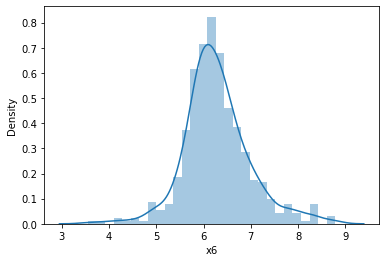

In [31]:
# 分布の確認
sns.distplot(df['x6'])#オリジナル

C:\Users\KijimaKenta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

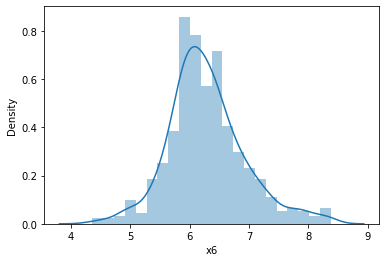

In [32]:
sns.distplot(df2['x6'])#データ成形後

In [33]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [41]:
_df = df
for col in cols:
    # 3σ
    low = mean[col]-3*sigma[col]
    high = mean[col]+3*sigma[col]
    
    # 条件を絞り込み
    _df = _df[(_df[col]>low)&(_df[col]<high)]
    _df

In [42]:
len(df)

506

In [43]:
len(_df)

415

対処法

- 外れ値を平均もしくは中央値等で埋める(ホカン)
- 外れ値は取り除く
- 主成分分析を使って、潜在変数に変換した後に、3σ法を適用←高度

# 入力変数と出力変数に分割

In [44]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [48]:
# df.iloc[行,列]
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [49]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: y, Length: 415, dtype: float64

# 訓練データと検証データに分割

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

# 重回帰分析

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
# モデルの宣言
model = LinearRegression()

In [56]:
# モデル学習
model.fit(X_train,y_train)

LinearRegression()

In [57]:
# 検証<=訓練データ
model.score(X_train,y_train)

0.7972109224535134

In [59]:
# 検証<=検証データ
model.score(X_test,y_test)

0.6253776004329588

In [60]:
# 過学習(オーバーフィッティング)

# スケーリング

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
# scalerの宣言
scaler = StandardScaler()

In [64]:
# scalerの学習 ←平均と標準偏差を計算
scaler.fit(X_train)

StandardScaler()

In [68]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [69]:
# モデルの宣言
# モデルの学習
model = LinearRegression()
model.fit(X_train2,y_train)


LinearRegression()

In [70]:
# 検証
model.score(X_train2,y_train)

0.7972109224535133

In [71]:
model.score(X_test2,y_test)

0.6253776004329598

In [73]:
# 重みの確認
np.set_printoptions(precision =2,suppress=True)

In [74]:
model.coef_

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

C:\Users\KijimaKenta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

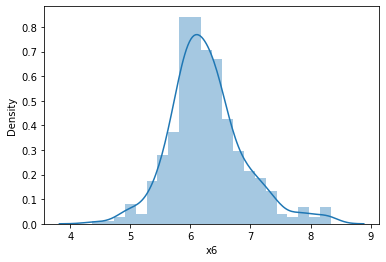

In [75]:
# 正規分布に近い方が重みが高い傾向
sns.distplot(_df['x6'])